In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
 df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# EDA

In [4]:
df.shape

(8523, 12)

In [5]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### We can se we have null value in item weight and outler_size so filling it with mean and backfill

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [10]:
df['Outlet_Size'].fillna(method='backfill',inplace=True)

In [11]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDG09     9
NCJ30     9
NCQ06     9
         ..
FDE52     1
FDN52     1
FDK57     1
FDO33     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

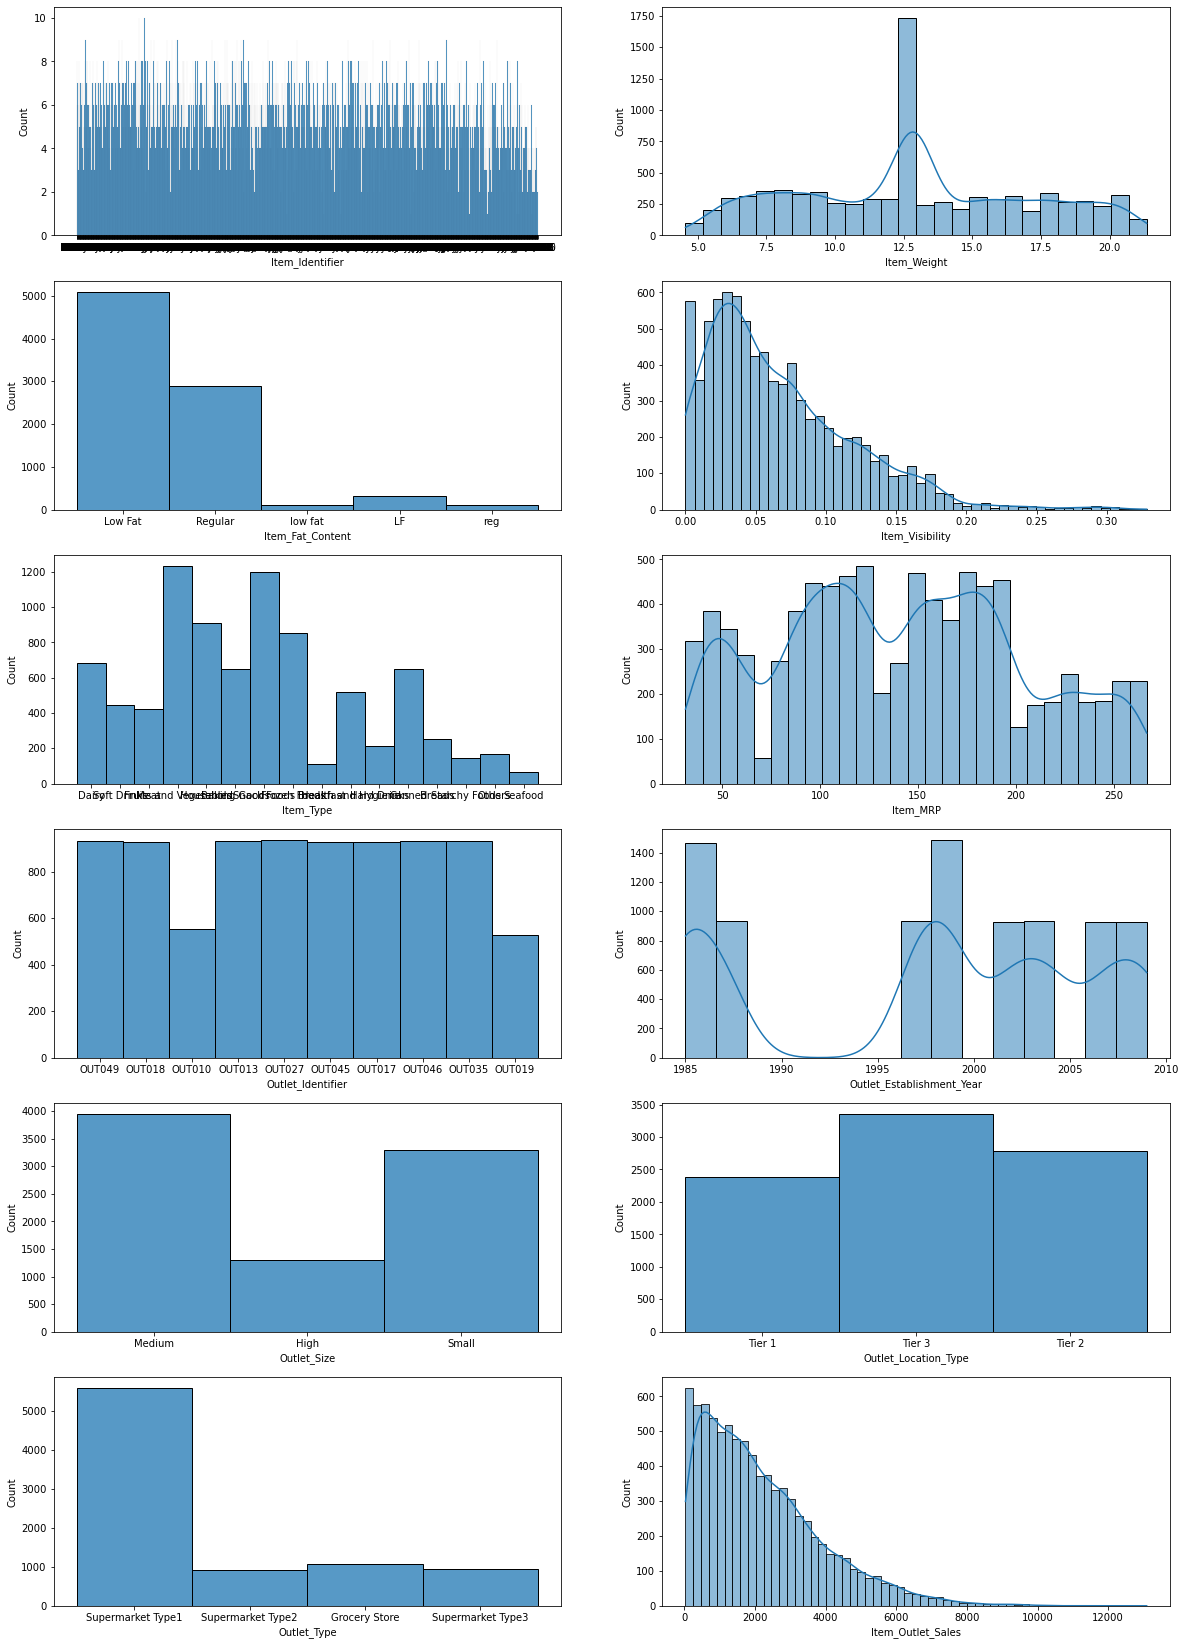

In [13]:
plt.figure(figsize=(20,100))
for i, column_data in enumerate(df.dtypes.items()):
    column , dtype = column_data
    
    plt.subplot(20,2,i+1)
    
    if dtype == 'object':
    
        sns.histplot(df[column])
    else:
        sns.histplot(df[column],kde=True)
    

##### We can see that 
* There is lots of item Identifier 
* Most of column are skewwed like (Item Weight, Item Visiblity Right Skewed, Item Outlier Sale are also right skewed)
* We can there are 2 other abbrivation of Low fat __LF, Low fat__ and 1 other abbrivation for Regular is __reg__ in Item_Fat_Content column so chaning it to one 

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

##### Chaning Fat column name to one 

In [15]:
def changeFatKeyword(value):
    value = value.replace('Low Fat','LF')
    value = value.replace('low fat','LF')
    value = value.replace('Regular','reg')
    
    return value

In [16]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(changeFatKeyword)

In [17]:
df['Item_Fat_Content'].value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

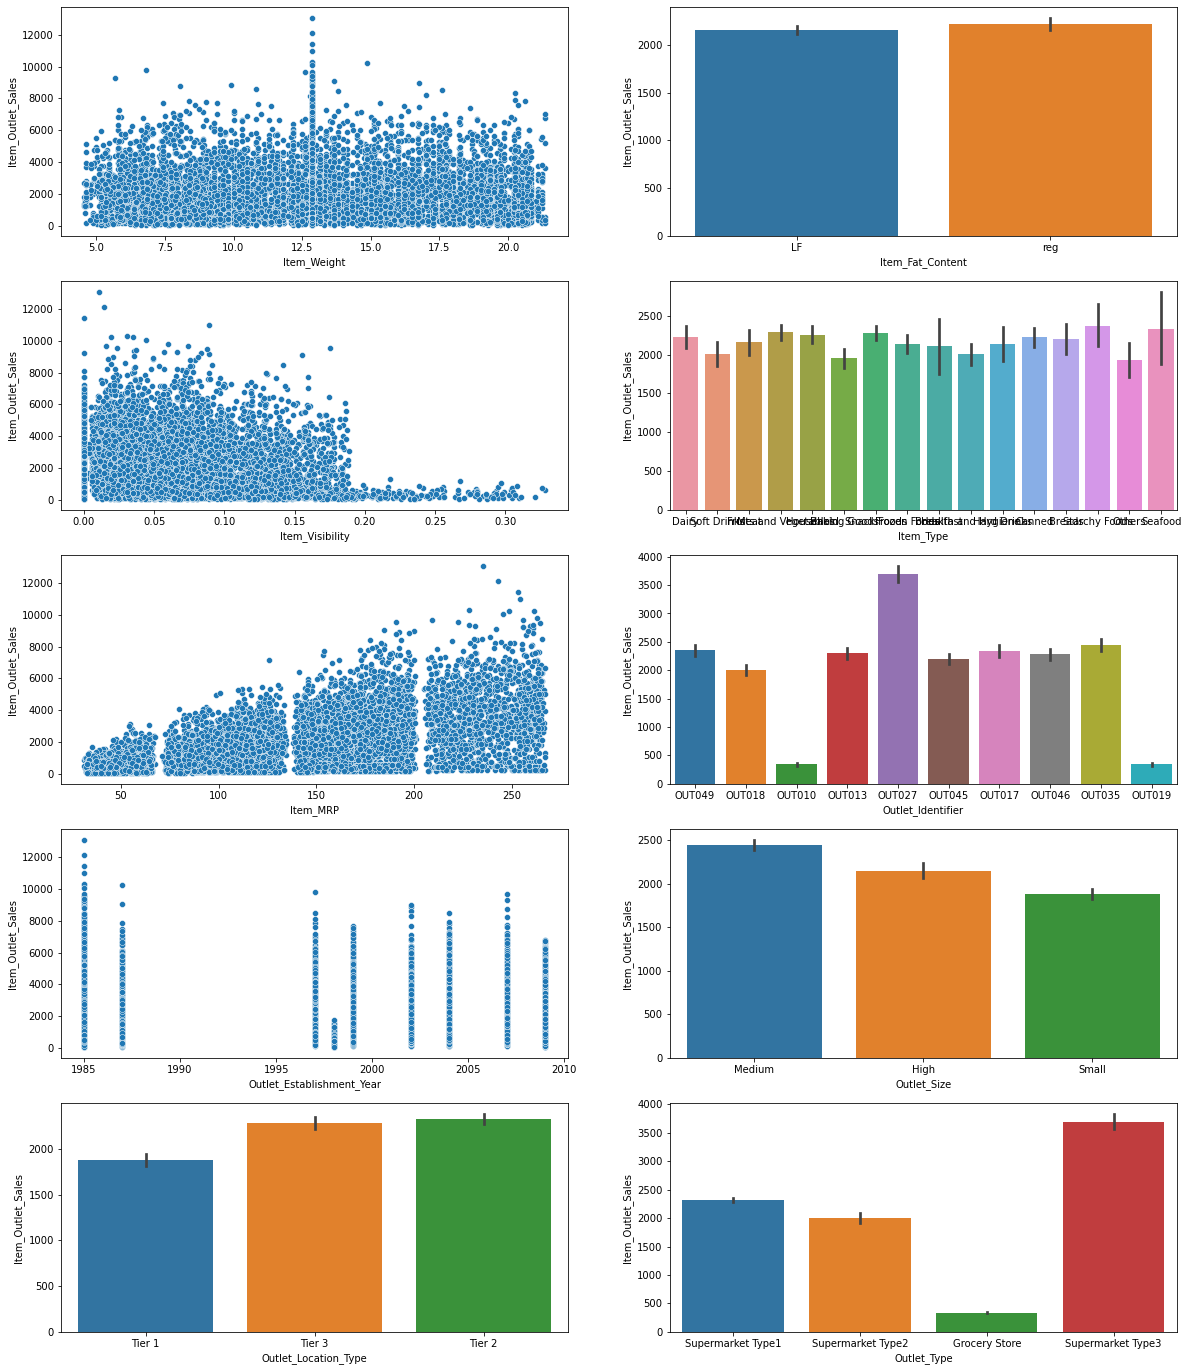

In [18]:
plt.figure(figsize=(20,100))
# Droping Item_Identifier because it will go messy with the sales 
# because there is larage no of Item_Identifier
for i, column_data in enumerate(df.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1).dtypes.items()):
    column , dtype = column_data
    
    plt.subplot(20,2,i+1)
    
    if dtype == 'object':
        sns.barplot(df[column],df['Item_Outlet_Sales'])
    else:
        sns.scatterplot(df[column],df['Item_Outlet_Sales'])

##### We can see that from insight that 
* Item Visiblity is seems realted to sales 
* We can also see that Hight MPR Product genrate more sales then the lower one
* OUT027 is earning more than the other one
* We can also see the oldest store earing more tan the new one
* We can also see that Medium size store earn more than the low and larage size store
* Tier 2 and tier 3 city genrate more sales than tier 1
* Supermarker Type 3 sales more prodcut and Grocery store sales very less

##### Performing Lable Encoder 

In [19]:
df = df.apply(LabelEncoder().fit_transform)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,0,664,4,5592,9,4,1,0,1,2540
1,8,57,1,880,14,473,3,8,1,2,2,422
2,662,376,0,715,10,2901,9,4,1,0,1,1639
3,1121,393,1,0,6,4227,0,3,0,2,0,670
4,1297,265,0,0,9,627,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,0,3912,13,4955,1,1,0,2,1,2047
8519,897,233,1,3278,0,2023,7,5,2,1,1,516
8520,1357,299,0,2302,8,1263,6,6,2,1,1,1018
8521,681,149,1,7175,13,1857,3,8,1,2,2,1466


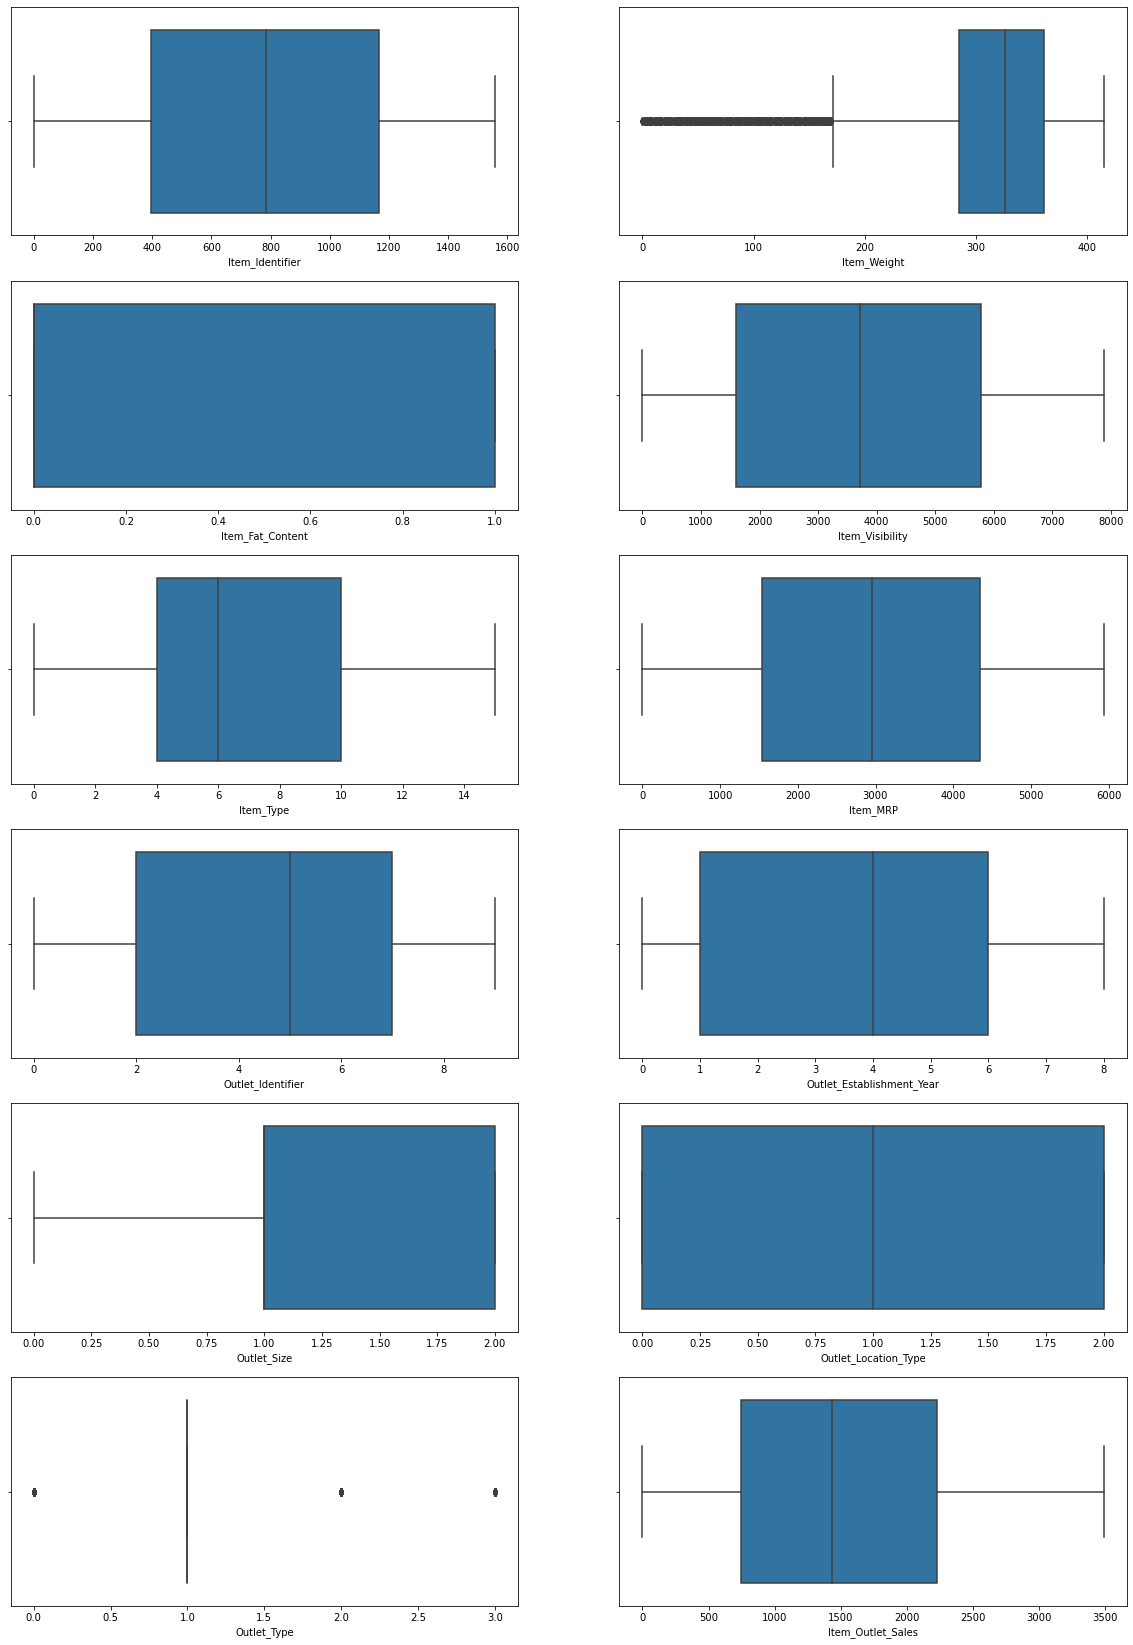

In [20]:
plt.figure(figsize=(20,100))
for i, column in enumerate(df.columns):
    plt.subplot(20,2,i+1)
    sns.boxplot(df[column])

##### We can see that there is a outlier in item Weight so removing it

In [21]:
z_score_abs = np.abs(stats.zscore(df))
z_score_abs

array([[1.38851383, 0.1546095 , 0.73814723, ..., 1.36933384, 0.25265831,
        1.10746187],
       [1.71799137, 2.53293092, 1.35474328, ..., 1.09156913, 1.00297245,
        1.19919284],
       [0.26205684, 0.8092917 , 0.73814723, ..., 1.36933384, 0.25265831,
        0.12620791],
       ...,
       [1.28515188, 0.00254831, 0.73814723, ..., 0.13888236, 0.25265831,
        0.55010587],
       [0.21975905, 1.56902973, 1.35474328, ..., 1.09156913, 1.00297245,
        0.06220157],
       [1.62449099, 0.50545328, 0.73814723, ..., 1.36933384, 0.25265831,
        0.89969802]])

In [22]:
df[z_score_abs>3].index

Int64Index([ 220,  599,  667,  733,  734,  885,  966, 1082, 1192, 1242, 1291,
            1412, 1494, 1500, 1515, 1537, 1943, 2198, 2254, 2373, 2720, 2743,
            2746, 3051, 3077, 3202, 3396, 3476, 3489, 3633, 3687, 3805, 4021,
            4348, 4400, 4430, 4606, 4640, 5415, 5493, 5514, 5563, 5595, 6252,
            6335, 6432, 6669, 7009, 7163, 7471, 7559, 7568, 7667, 7808, 7976,
            7984, 8219],
           dtype='int64')

In [23]:
df.shape

(8523, 12)

In [24]:
df.drop(df[z_score_abs>3].index,axis=0,inplace=True)

In [25]:
df.shape

(8466, 12)

## Checking For VIF

In [26]:
X = df.drop('Item_Outlet_Sales',axis=1)
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

,VIF,columns
6,10.161617,Outlet_Identifier
9,9.818296,Outlet_Location_Type
1,9.344525,Item_Weight
10,7.674770,Outlet_Type
8,5.287512,Outlet_Size
5,3.925782,Item_MRP
4,3.827103,Item_Type
0,3.823981,Item_Identifier
3,3.278720,Item_Visibility
7,2.983525,Outlet_Establishment_Year


##### All VIF are less or almost 10 so leaving it

## Skewness

##### We can there is a little skewness in that data so Apply Power Transformation

In [27]:
X.skew().abs().sort_values()

Item_MRP                     0.002337
Item_Identifier              0.004105
Item_Visibility              0.024859
Outlet_Establishment_Year    0.035854
Outlet_Identifier            0.058518
Item_Type                    0.098976
Outlet_Location_Type         0.209747
Outlet_Size                  0.350637
Item_Fat_Content             0.617191
Outlet_Type                  0.923601
Item_Weight                  1.418418
dtype: float64

# split features

In [28]:
X = df.drop('Item_Outlet_Sales',axis=1)
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,284,0,664,4,5592,9,4,1,0,1
1,8,57,1,880,14,473,3,8,1,2,2
2,662,376,0,715,10,2901,9,4,1,0,1
3,1121,393,1,0,6,4227,0,3,0,2,0
4,1297,265,0,0,9,627,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,0,3912,13,4955,1,1,0,2,1
8519,897,233,1,3278,0,2023,7,5,2,1,1
8520,1357,299,0,2302,8,1263,6,6,2,1,1
8521,681,149,1,7175,13,1857,3,8,1,2,2


In [29]:
y = df['Item_Outlet_Sales']
y

0       2540
1        422
2       1639
3        670
4        865
        ... 
8518    2047
8519     516
8520    1018
8521    1466
8522     697
Name: Item_Outlet_Sales, Length: 8466, dtype: int64

In [30]:
X_transformed = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transformed,columns=X.columns)
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.463426,-0.453315,-0.737976,-1.243742,-0.719523,1.445432,1.428407,0.196999,-0.395258,-1.373409,-0.124218
1,-2.099691,-2.054503,1.355058,-1.091648,1.505561,-1.580189,-0.548528,1.391792,-0.395258,1.087459,1.037388
2,-0.153917,0.969210,-0.737976,-1.206044,0.681357,0.072790,1.428407,0.196999,-0.395258,-1.373409,-0.124218
3,0.773803,1.285677,1.355058,-2.124074,-0.221575,0.780021,-1.810138,-0.155157,-1.685459,1.087459,-1.912850
4,1.098436,-0.687824,-0.737976,-2.124074,0.464500,-1.442284,-1.344368,-0.986849,-1.685459,1.087459,-0.124218
...,...,...,...,...,...,...,...,...,...,...,...
8461,-0.845164,-1.833757,-0.737976,0.259460,1.305168,1.141304,-1.344368,-0.986849,-1.685459,1.087459,-0.124218
8462,0.338387,-1.038584,1.355058,0.035512,-1.929898,-0.446111,0.811285,0.522711,1.136299,-0.131500,-0.124218
8463,1.206149,-0.254110,-0.737976,-0.351647,0.242266,-0.949362,0.489796,0.827959,1.136299,-0.131500,-0.124218
8464,-0.112428,-1.706569,1.355058,1.217278,1.305168,-0.550746,-0.548528,1.391792,-0.395258,1.087459,1.037388


In [31]:
X.skew().abs().sort_values()

Outlet_Type                  0.007581
Item_Type                    0.163602
Outlet_Size                  0.187458
Outlet_Identifier            0.213252
Outlet_Establishment_Year    0.218983
Outlet_Location_Type         0.221091
Item_MRP                     0.287643
Item_Identifier              0.290573
Item_Weight                  0.558248
Item_Visibility              0.593730
Item_Fat_Content             0.617191
dtype: float64

# Splitng Train Test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,shuffle=True)

# Model Building

## LinearRegression

In [33]:
linearRegression = LinearRegression()

In [34]:
linearRegression.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = linearRegression.predict(X_test)

In [36]:
mean_absolute_error(y_test,y_pred)

466.735910193936

In [37]:
mean_squared_error(y_test,y_pred)

344160.1728689612

In [38]:
r2_score(y_test,y_pred)

0.6029982250105674

### CV

In [39]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    LinearRegression(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.5768080270504294
std:  0.023591733431596224


## ridge

In [40]:
ridge = Ridge()

In [41]:
ridge.fit(X_train,y_train)

Ridge()

In [42]:
y_pred = ridge.predict(X_test)

In [43]:
mean_absolute_error(y_test,y_pred)

466.74447777034356

In [44]:
mean_squared_error(y_test,y_pred)

344162.7687641519

In [45]:
r2_score(y_test,y_pred)

0.6029952305472923

### CV

In [46]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    Ridge(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.5768082237018906
std:  0.02359123609592221


## DecisionTreeRegressor

In [47]:
decisionTreeRegressor = DecisionTreeRegressor()

In [48]:
decisionTreeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [49]:
y_pred = decisionTreeRegressor.predict(X_test)

In [50]:
mean_absolute_error(y_test,y_pred)

558.6400566839868

In [51]:
mean_squared_error(y_test,y_pred)

559966.0080302315

In [52]:
r2_score(y_test,y_pred)

0.3540580327218972

### CV

In [53]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    DecisionTreeRegressor(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.3003122041194305
std:  0.02713208565443842


## KNeighborsRegressor

In [54]:
kNeighborsRegressor = KNeighborsRegressor()

In [55]:
kNeighborsRegressor.fit(X_train,y_train)

KNeighborsRegressor()

In [56]:
y_pred = kNeighborsRegressor.predict(X_test)

In [57]:
mean_absolute_error(y_test,y_pred)

455.72026452527166

In [58]:
mean_squared_error(y_test,y_pred)

345636.9026924894

In [59]:
r2_score(y_test,y_pred)

0.6012947613115771

### CV

In [60]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    KNeighborsRegressor(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.5793596141516356
std:  0.027473871211238152


## SVR

In [61]:
svr = SVR()

In [62]:
svr.fit(X_train,y_train)

SVR()

In [63]:
y_pred = svr.predict(X_test)

In [64]:
mean_absolute_error(y_test,y_pred)

701.5680782188105

In [65]:
mean_squared_error(y_test,y_pred)

708629.6834021258

In [66]:
r2_score(y_test,y_pred)

0.18256886095893832

### CV

In [67]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    SVR(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.20752698983992723
std:  0.011056589408716894


## XGBRegressor

In [68]:
xGBRegressor = XGBRegressor()

In [69]:
xGBRegressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_pred = xGBRegressor.predict(X_test)

In [71]:
mean_absolute_error(y_test,y_pred)

443.670858758657

In [72]:
mean_squared_error(y_test,y_pred)

342092.42996278405

In [73]:
r2_score(y_test,y_pred)

0.6053834446515591

### CV

In [74]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    XGBRegressor(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.6064839006794601
std:  0.022597411066993686


## RandomForestRegressor

In [75]:
randomForestRegressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [76]:
randomForestRegressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [77]:
y_pred = randomForestRegressor.predict(X_test)

In [78]:
mean_absolute_error(y_test,y_pred)

425.50050543221545

In [79]:
mean_squared_error(y_test,y_pred)

309798.71328620694

In [80]:
r2_score(y_test,y_pred)

0.6426354681344983

### CV

In [81]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    RandomForestRegressor(),
    X,
    y,
    cv=kFold,
    scoring='r2',
    n_jobs=-1
)
print('score: ',np.mean(scores))
print('std: ',np.std(scores))

score:  0.622107041986682
std:  0.024148228182596303


##### We can find the best model is RandomForestRegressor so choosing it best model

## Hyper Parameter Tuning

In [82]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, None],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [100,200]
}
gridSearchCV = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1)

In [83]:
gridSearchCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200]})

In [84]:
gridSearchCV.best_score_

0.645422854338891

In [85]:
gridSearchCV.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

### Creating model with tunned parameter

In [86]:
randomForestRegressor = RandomForestRegressor(
    bootstrap=True, max_depth=10, max_features='sqrt', n_estimators = 200, random_state = 42
)

In [87]:
randomForestRegressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [88]:
y_pred = randomForestRegressor.predict(X_test)

In [89]:
mean_absolute_error(y_test,y_pred)

415.01567527674746

In [90]:
mean_squared_error(y_test,y_pred)

285655.9584726979

In [91]:
r2_score(y_test,y_pred)

0.6704850488520997

### Saving the Best model

In [92]:
pickle.dump(randomForestRegressor,open('grid_search_cv.pkl','wb'))

## Predicting the Test Data

In [93]:
df_testing = pd.read_csv('bigdatamart_Test.csv')
df_testing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [94]:
df_testing = df_testing.apply(LabelEncoder().fit_transform)
df_testing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,403,1,66,13,1460,9,4,1,0,1
1,1067,223,4,1714,4,965,2,7,3,1,1
2,1406,337,1,4042,11,4076,0,3,3,2,0
3,809,156,1,388,13,2522,2,7,3,1,1
4,1184,410,2,4423,4,3972,5,0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,293,2,290,13,2164,8,2,2,0,1
5677,306,178,2,4815,15,2833,3,8,1,2,2
5678,1412,288,1,3256,8,1752,7,5,3,1,1
5679,517,348,2,0,3,3691,2,7,3,1,1


In [95]:
y_pred = randomForestRegressor.predict(df_testing)
y_pred

array([2222.39767955, 2134.00557559, 2081.58654426, ..., 2134.00557559,
       2334.36335691, 2134.00557559])